In [1]:
!pip install kaggle


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!dir

 Volume in drive G is New Volume
 Volume Serial Number is 2CE9-B64D

 Directory of G:\Plant Disease Detection

06-09-2024  12:04    <DIR>          .
06-09-2024  12:04    <DIR>          ..
06-09-2024  11:37    <DIR>          .ipynb_checkpoints
06-09-2024  11:32             1,316 class_indices.json
06-09-2024  00:24                67 kaggle.json
06-09-2024  12:04           149,187 PlantDisease.ipynb
06-09-2024  11:16            20,183 test_potato_early_blight.jpg
               4 File(s)        170,753 bytes
               3 Dir(s)  409,638,760,448 bytes free


In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:03<1:59:57, 304kB/s]
  0%|          | 2.00M/2.04G [00:05<1:41:32, 359kB/s]
  0%|          | 3.00M/2.04G [00:09<1:49:44, 332kB/s]
  0%|          | 4.00M/2.04G [00:11<1:40:56, 361kB/s]
  0%|          | 5.00M/2.04G [00:14<1:34:02, 387kB/s]
  0%|          | 6.00M/2.04G [00:16<1:26:20, 421kB/s]
  0%|          | 7.00M/2.04G [00:18<1:20:23, 452kB/s]
  0%|          | 8.00M/2.04G [00:20<1:17:59, 466kB/s]
  0%|          | 9.00M/2.04G [00:22<1:18:22, 464kB/s]
  0%|          | 10.0M/2.04G [00:25<1:24:24, 430kB/s]
  1%|          | 11.0M/2.04G [00:27<1:24:16, 431kB/s]
  1%|          | 12.0M/2.04G [00:31<1:31:02, 398kB/s]
  1%|          | 13.0M/2.04G [00:34<1:35:06, 381kB/s]
  1%|          | 14.0M/2.04G [00:38<1:52:39, 322kB/s]
  1%|          | 15.0M/2.04G [00:41<1:47:49, 336kB/s]
  1%|          | 16.0M/2.04G [00:44<1:47:58, 335kB/s]
  1%|          | 17.0M/2.04G [00:48<1:55:08, 314kB/s]
  1%|          | 18.0M/2.04G [00:52<2

In [8]:
!dir

 Volume in drive G is New Volume
 Volume Serial Number is 2CE9-B64D

 Directory of G:\Plant Disease Detection

06-09-2024  12:27    <DIR>          .
06-09-2024  12:27    <DIR>          ..
06-09-2024  11:37    <DIR>          .ipynb_checkpoints
06-09-2024  00:24                67 kaggle.json
06-09-2024  12:06            14,900 PlantDisease.ipynb
28-10-2019  12:25     2,189,386,419 plantvillage-dataset.zip
06-09-2024  11:16            20,183 test_potato_early_blight.jpg
               4 File(s)  2,189,421,569 bytes
               3 Dir(s)  407,449,505,792 bytes free


In [9]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))

['color', 'grayscale', 'segmented']


In [11]:
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [12]:
print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [13]:
print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [14]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [15]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


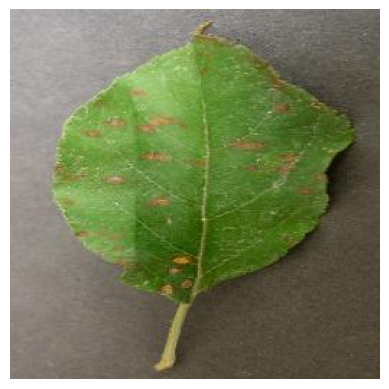

In [16]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'
img = mpimg.imread(image_path)
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [18]:
img_size = 224
batch_size = 32

In [19]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [20]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  
    epochs=7,  #THALA_FOR_A_REASON + SIUUUUUUUUU....
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  
)

Epoch 1/7


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2191s 2s/step - accuracy: 0.6048 - loss: 1.8572 - val_accuracy: 0.8399 - val_loss: 0.5025
Epoch 2/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.2244
Epoch 3/7


C:\Users\ACER\.conda\envs\gee\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1801s 1s/step - accuracy: 0.9201 - loss: 0.2541 - val_accuracy: 0.8725 - val_loss: 0.4264
Epoch 4/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.1921e-06
Epoch 5/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2037s 1s/step - accuracy: 0.9676 - loss: 0.1049 - val_accuracy: 0.8682 - val_loss: 0.4759
Epoch 6/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 2.4606
Epoch 7/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1702s 1s/step - accuracy: 0.9768 - loss: 0.0705 - val_accuracy: 0.8659 - val_loss: 0.6094


In [26]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 78s 228ms/step - accuracy: 0.8623 - loss: 0.6251
Validation Accuracy: 86.59%


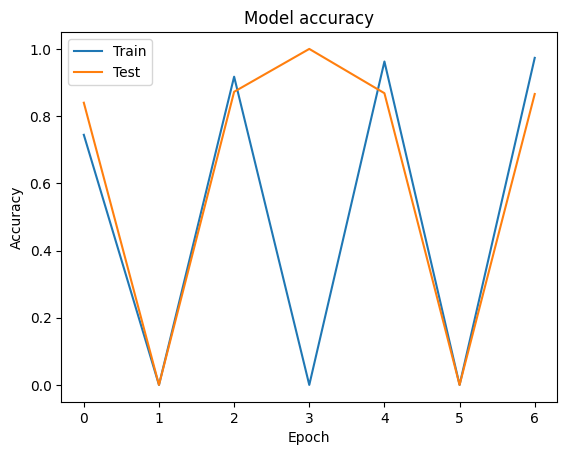

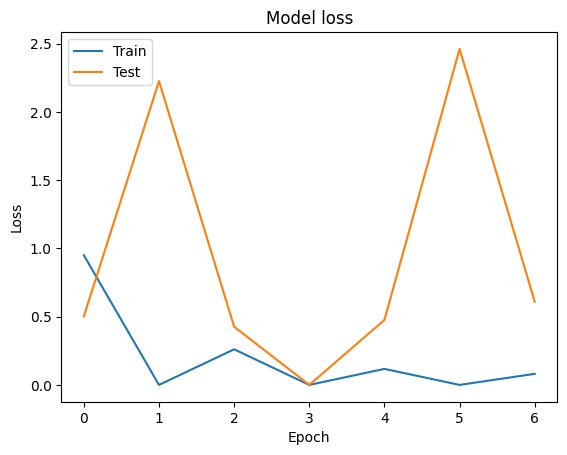

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [29]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [30]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [31]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [32]:
#image_path = 'test_potato_early_blight.jpg'
#predicted_class_name = predict_image_class(model, image_path, class_indices)
#print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Class Name: Potato___Early_blight


In [33]:
model.save('plant_disease_prediction_model.h5')